## Visualization of training set and resampled data ##

In [7]:
import pickle
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

data_original = 'dataset_original.data'
data_resamp   = 'dataset.data'
data_train = 'training_full.data'

d0 = pickle.load(open(data_original))
dr = pickle.load(open(data_resamp))
dset = pickle.load(open(data_train))
print 'Number of entries in original:%d\nresampled:%d'%(len(d0['tfeatures']), len(dr['tfeatures']))


print d0.keys()

Number of entries in original:6605
resampled:8619
['tfeatures', 'vclass', 'tclass', 'vfeatures']


In [8]:
# Visualization functions 

from matplotlib.colors import LogNorm
import matplotlib.gridspec as gsc
from scipy.ndimage.filters import gaussian_filter

def make_plotvar(ax,x,y,xname='',yname='',contaminant=False,color='k',label='',marker='o', make_contour=False,
                xr=[-1,3],yr=[-1,3],edge=False):
    if make_contour:
        cc, xbins,ybins = get_contour(x,y)
       
        #import pdb; pdb.set_trace()
        #ax.plot(x,y,'k,')
        cc = gaussian_filter(cc, 1.2)
        ax.contourf(xbins,ybins,cc.transpose(),linewidths=3,extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],
                  cmap=plt.cm.Greys,alpha=0.2,levels=[2,70,100,1000,10000],norm = LogNorm())
    elif contaminant:
        ax.plot(x,y,'.',color='black',alpha=.5,label=label,markersize=1)
    else:
        if edge:
            ax.plot(x,y,marker,color=color,alpha=.8,label=label,markersize=10,markeredgecolor='black')
        else:
            ax.plot(x,y,marker,color=color,alpha=.6,label=label,markersize=9)
            
    ax.set_xlabel('dm j0660' if xname == 'dm_j0660' else r'$%s$'%xname,fontsize=30)
    ax.set_ylabel('dm j0660' if yname == 'dm_j0660' else r'$%s$'%yname,fontsize=30)
            
    return 1



def plot_parameterspace(grid,xval, yval,xname_arr, yname_arr, class_arr,figname='fig',
                        classes_names = ['Halpha','OIII+Hbeta','OII', 'contaminant'],
                       figsize=(30,30),mark_synthetic=False,obj = None):
    
    plt.figure(figname,figsize=figsize)

    #classes_names = ['Halpha','OIII+Hbeta','OII', 'contaminant']
    s_names = [r'H$\alpha$',r'H$\beta$+[O III]',r'[O II]']
    colors = plt.cm.Set1(np.linspace(0,1,9))
    suff = 'SDSS'
     
    ncax = len(xname_arr)
    ncay = len(yname_arr)
    
    
     
    for i in range(ncax):
        xname = xname_arr[i]
        for j in range(ncay):
            yname= yname_arr[j]
            ax = plt.subplot(grid[j,i])
            
            if xname == yname:
                    ax.plot([-100,100],[100,-100],'k-')
                    ax.set_xticklabels([''])
                    ax.set_yticklabels([''])
                    if j == 0:
                        ax.set_ylabel(r'$%s$'%yname,fontsize=30)
                    if i == ncax-1 and j == ncay-1:
                        ax.set_xlabel(r'$%s$'%xname,fontsize=30)
                    continue

            if len(classes_names) == 1:
                make_plotvar(ax,xval[:,i],yval[:,j],xname=xname,yname=yname,
                            make_contour=True)
                
            else:
                iic = 0
                for ic in classes_names:
                    if ic == 'OII' and mark_synthetic:
                        mask = (np.asarray(class_arr) == ic) & (np.asarray(obj) == 'Cross-match')
                        make_plotvar(ax,xval[mask,i],yval[mask,j],xname=xname,yname=yname,
                        color=colors[iic],contaminant=True if ic == 'contaminant' else False,
                        label=ic)

                        mask = (np.asarray(class_arr) == ic) & (np.asarray(obj) != 'Cross-match')
                        make_plotvar(ax,xval[mask,i],yval[mask,j],xname=xname,yname=yname,
                        color=colors[iic],contaminant=True if ic == 'contaminant' else False,
                        label='synthetic '+ic,marker='*',edge=True)

                    else:
                        mask = np.asarray(class_arr) == ic
                        make_plotvar(ax,xval[mask,i],yval[mask,j],xname=xname,yname=yname,
                        color=colors[iic],contaminant=True if ic == 'contaminant' else False,
                        label=ic)


                    iic +=1
                
            if i >0:
                ax.set_ylabel('')
            if j < ncay-1:
                ax.set_xlabel('')
            if j == 0 and i == 4:
                plt.legend(loc='upper center',fontsize=50,bbox_to_anchor=(0.5, 1.5),ncol=5)

    
    return 1
        
def get_contour(xdata, ydata,nbins=20):
# Plots a contour using as input 
    dgrid = np.zeros([nbins,nbins])

    xmin,xmax= xdata.min(), xdata.max()
    ymin,ymax= ydata.min(), ydata.max()
    xarr = np.linspace(xmin,xmax,num=nbins)
    yarr = np.linspace(ymin,ymax,num=nbins)
    xb = xarr[1]-xarr[0]
    yb = yarr[1]-yarr[0]

    for ix in range(nbins):
        for iy in range(nbins):
            sel = np.where(((xdata > xarr[ix]-xb/2.) & (xdata <= xarr[ix]+xb/2.) &
                            (ydata > yarr[iy]-yb/2.) & (ydata <= yarr[iy]+yb/2.)))[0]
            if len(sel) > 0:
                dgrid[ix,iy] += len(sel)

    return dgrid, xarr,yarr




In [ ]:
suff = 'SDSS'
feat_names = ['J0660-C^{r,g}','J0660',
            'u'+suff, 'g'+suff, 'r'+suff, 'i'+suff,'z'+suff, 'u-g','g-r','r-i','i-z','u-z','r-z']


allfeat = d0['tfeatures']
class_arr = d0['tclass']
ngal = len(class_arr)
all_classes = np.unique(class_arr)

colors = [7,8,9,10,11,12] #indices of colours
cnames = [feat_names[x] for x in colors]
ncol = len(colors)
coldata = np.zeros([ngal,ncol])
for i in range(ncol):
    icol = colors[i]
    coldata[:,i] = np.asarray([allfeat[x][icol] for x in range(ngal)])


    
plot_parameterspace(coldata,coldata,cnames,cnames,class_arr,classes_names = all_classes,figname='original')


  

In [ ]:
allfeat = dr['tfeatures']
class_arr = dr['tclass']
ngal = len(class_arr)
all_classes = np.unique(class_arr)

colors = [7,8,9,10,11,12] #indices of colours
cnames = [feat_names[x] for x in colors]
ncol = len(colors)
coldata = np.zeros([ngal,ncol])
for i in range(ncol):
    icol = colors[i]
    coldata[:,i] = np.asarray([allfeat[x][icol] for x in range(ngal)])

plot_parameterspace(coldata,coldata,cnames,cnames,class_arr,classes_names = all_classes,figname='resampled')


In [ ]:
suff = 'SDSS'
feat_names = ['C^{r,g}-J0660','J0660',
            'u'+suff, 'g'+suff, 'r'+suff, 'i'+suff,'z'+suff, 'u-g','g-r','r-i','i-z','u-z','r-z']


allfeat = d0['tfeatures']
class_arr = d0['tclass']
ngal = len(class_arr)
all_classes = np.unique(class_arr)

colors = np.arange(len(feat_names)) #indices of colours
cnames = [feat_names[x] for x in colors]
ncol = len(colors)
coldata = np.zeros([ngal,ncol])
for i in range(ncol):
    icol = colors[i]
    coldata[:,i] = np.asarray([allfeat[x][icol] for x in range(ngal)])


    
plot_parameterspace(coldata,coldata,cnames,cnames,class_arr,classes_names = all_classes,
                    figname='original',figsize=(70,70))


  

In [ ]:
suff = 'SDSS'
feat_names = ['C^{r,g}-J0660','J0660',
            'u'+suff, 'g'+suff, 'r'+suff, 'i'+suff,'z'+suff, 'u-g','g-r','r-i','i-z','u-z','r-z']


allfeat = np.asarray(dr['tfeatures'])
class_arr = np.asarray(dr['tclass'])
ngal = len(class_arr)
all_classes = np.unique(class_arr)

colors = np.arange(len(feat_names)) #indices of colours
mask = np.where(allfeat[:,0] > 0.4)[0] # dm_j0660 greater than 0.4.
nmasked = len(allfeat[mask])

cnames = [feat_names[x] for x in colors]
ncol = len(colors)
coldata = np.zeros([nmasked,ncol])
feats = allfeat[mask]
carr  = class_arr[mask]

for i in range(ncol):
    icol = colors[i]
    coldata[:,i] = np.asarray([feats[x][i] for x in range(nmasked)])

    
plot_parameterspace(coldata,coldata,cnames,cnames,carr,classes_names = all_classes,
                    figname='original',figsize=(70,70))





  

In [ ]:
dset.keys()
print dset['obj']

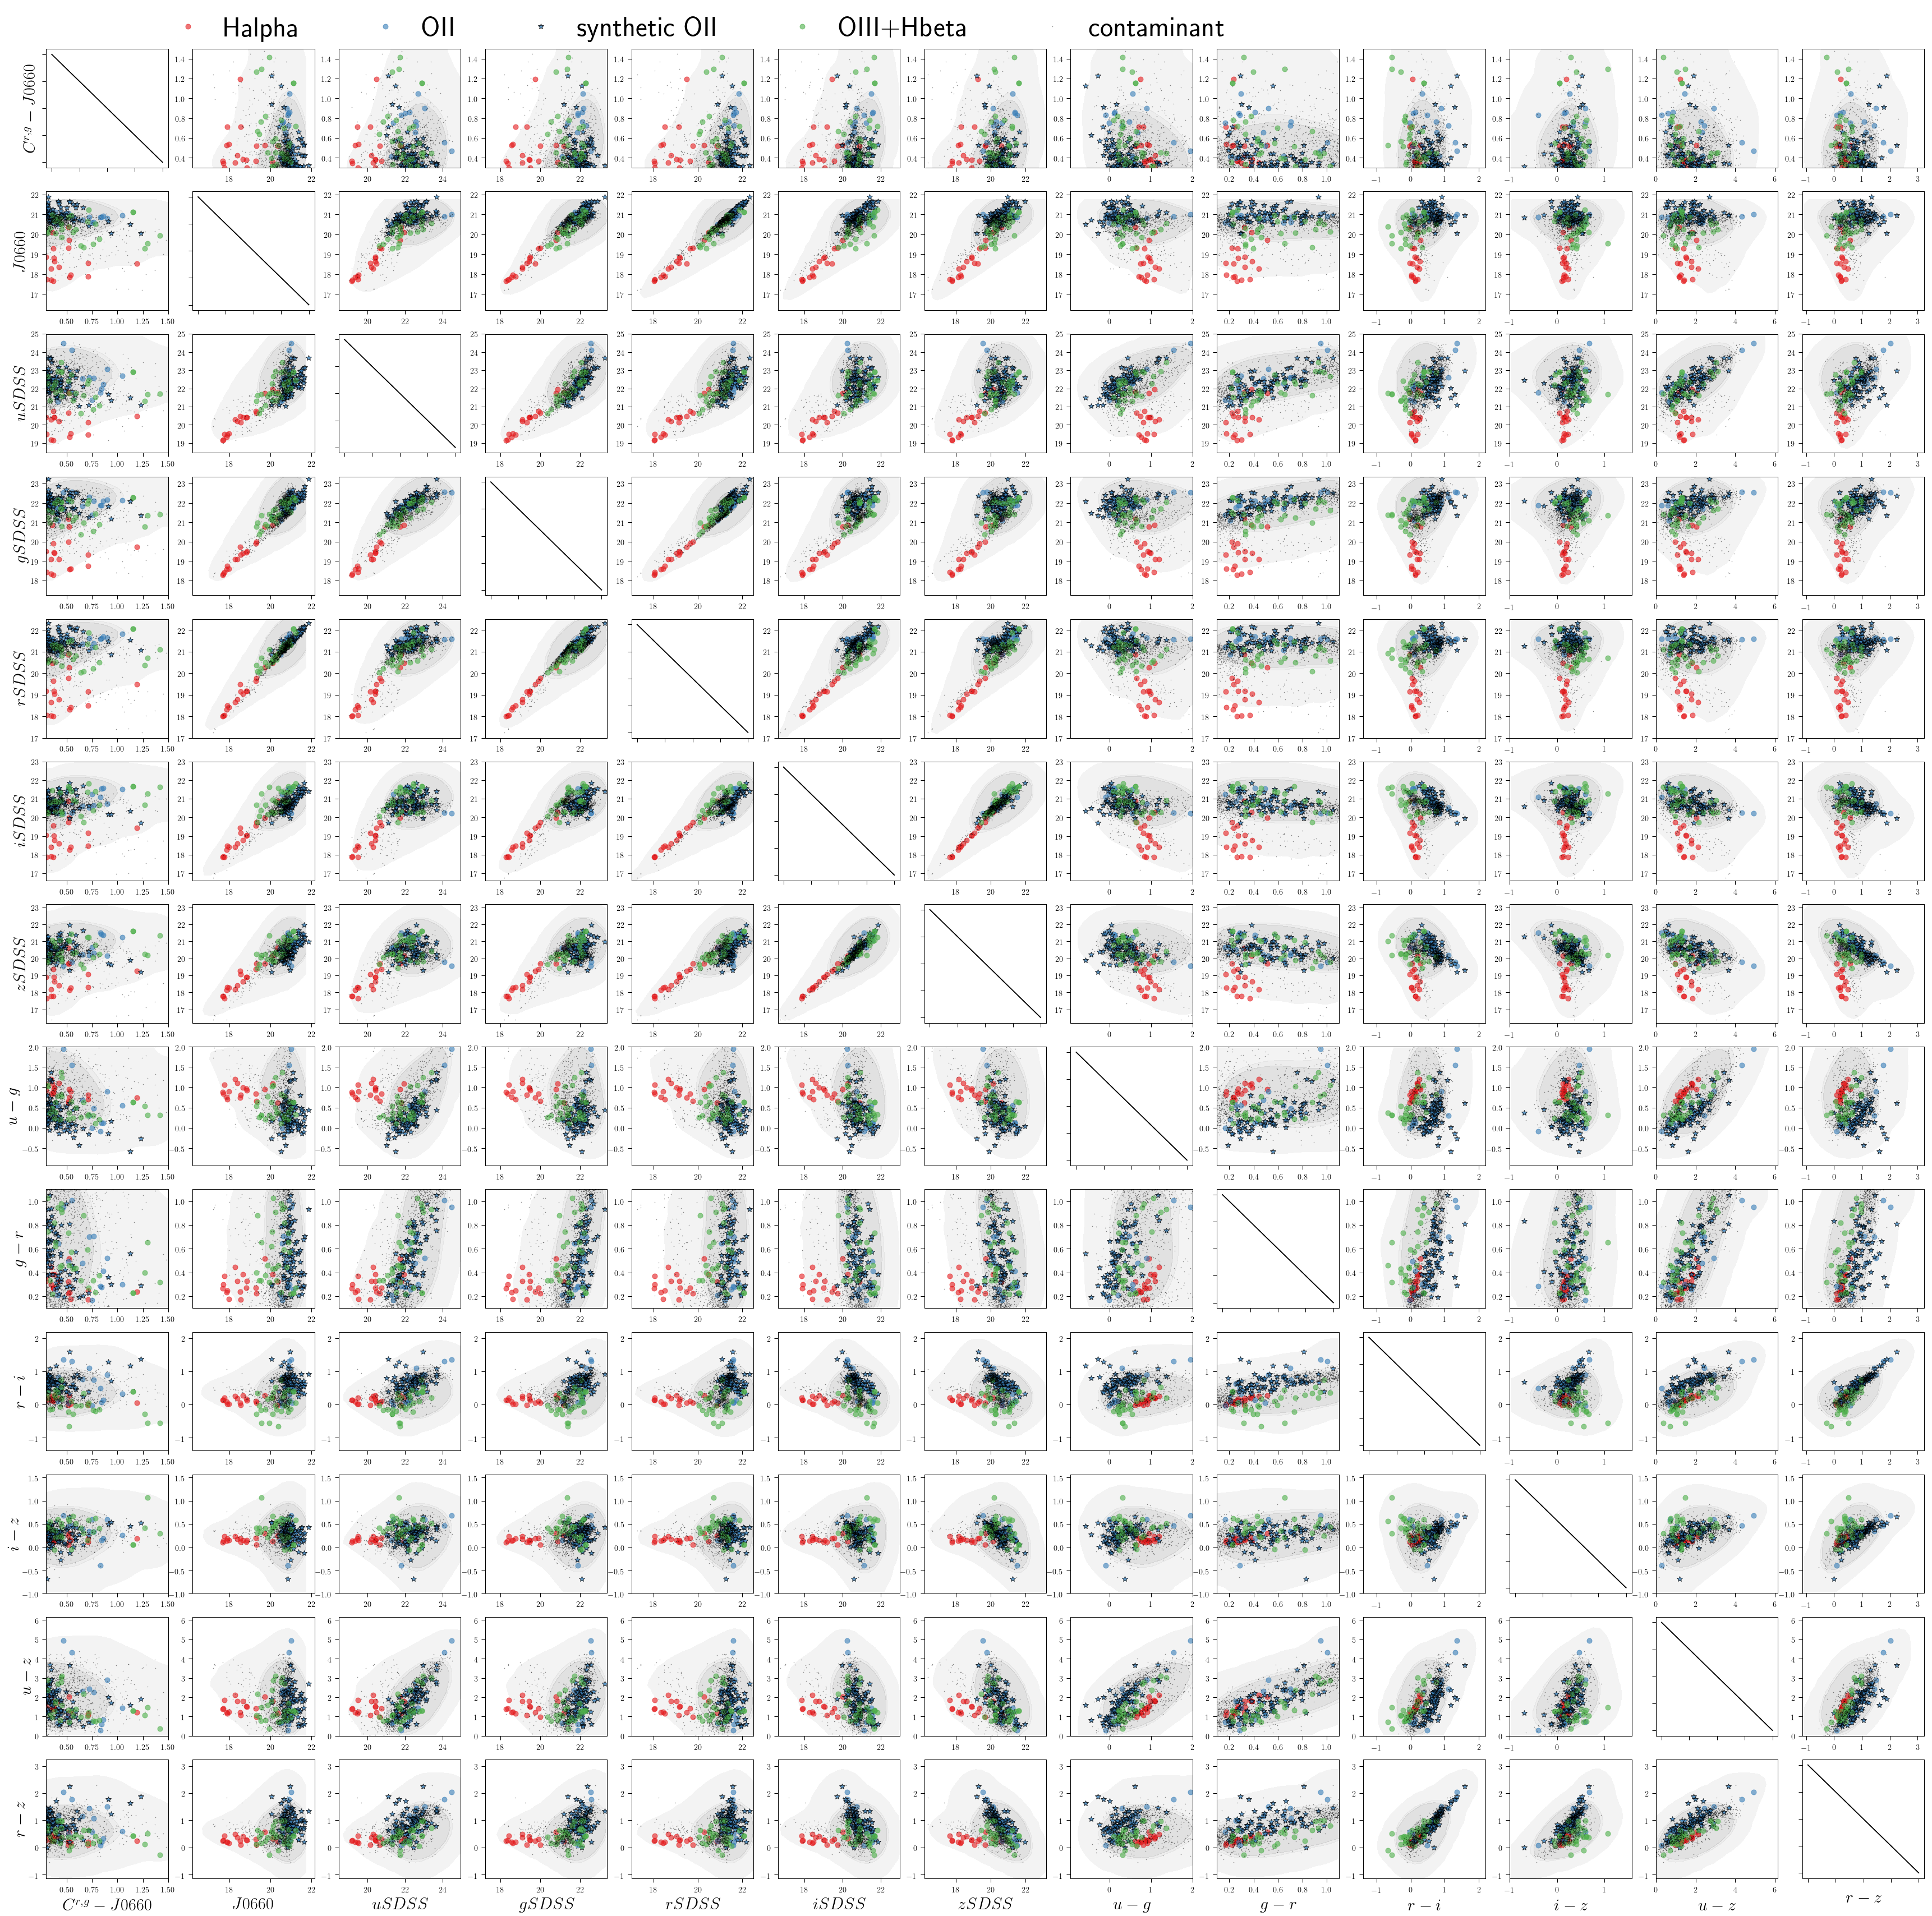

In [9]:
# read candidate set

cand = pickle.load(open('candidates.data','rb'))
cand['dm_j0660'] = np.asarray([[x,0] for x in cand['dm_j0660']])

suff = 'SDSS'

nobj = len(dset['obj'])

def get_feats(data,nobj):
    feat_names = ['C^{r,g}-J0660','J0660',
            'u'+suff, 'g'+suff, 'r'+suff, 'i'+suff,'z'+suff, 'u-g','g-r','r-i','i-z','u-z','r-z']

    featnames = ['dm_j0660','J0660','uSDSS','gSDSS','rSDSS','iSDSS','zSDSS']

    feat_arr = []

    for x in range(nobj):
        fx = []
        for y in featnames:
            if len(data[y][x]) == 1:
                fx.append(data[y][x])
            else:
                fx.append(data[y][x,0])
        fx.append(data['uSDSS'][x,0]-data['gSDSS'][x,0])
        fx.append(data['gSDSS'][x,0]-data['rSDSS'][x,0])
        fx.append(data['rSDSS'][x,0]-data['iSDSS'][x,0])
        fx.append(data['iSDSS'][x,0]-data['zSDSS'][x,0])
        fx.append(data['uSDSS'][x,0]-data['zSDSS'][x,0])
        fx.append(data['rSDSS'][x,0]-data['zSDSS'][x,0])

        feat_arr.append(fx)
    
   
    colors = np.arange(len(feat_names)) #indices of colours
    cnames = [feat_names[x] for x in colors]
    ncol = len(colors)
    coldata = np.zeros([nobj,ncol])
    for i in range(ncol):
        icol = colors[i]
        coldata[:,i] = np.asarray([feat_arr[x][icol] for x in range(nobj)])



    return feat_arr, coldata,cnames



class_arr = dset['class']


allfeat, coldata,cnames = get_feats(dset,nobj)
candfeat, candata, cnames  = get_feats(cand,len(cand['tile_id']))

#class_arr = d0['tclass']
all_classes = np.unique(class_arr)

ncax = len(cnames)
ncay = len(cnames)
grid = gsc.GridSpec(ncay,ncax)
plot_parameterspace(grid,candata,candata,cnames,cnames,class_arr,classes_names = ['dataset'],
                    figname='original',figsize=(60,60),obj=dset['obj'])

plot_parameterspace(grid,coldata,coldata,cnames,cnames,class_arr,classes_names = all_classes,
                    figname='original',figsize=(60,60),mark_synthetic=True,obj=dset['obj'])


plt.savefig('full_dataset.png',bbox_inches='tight')
  

In [22]:
print cnames

[[0.6619736509335397, 20.902113, 23.5825, 22.73026, 21.65097, 21.3018, 20.80379, 0.8522399999999983, 1.0792900000000003, 0.34917000000000087, 0.49801000000000073, 2.7787100000000002, 0.8471800000000016], [1.4815092813878508, 20.8371449, 24.18781, 23.15716, 22.16359, 20.80063, 20.08511, 1.0306499999999978, 0.9935700000000018, 1.3629599999999975, 0.7155200000000015, 4.102699999999999, 2.078479999999999], [0.31002179740765357, 20.3024788, 22.55962, 21.31302, 20.69329, 20.3032, 20.03881, 1.2465999999999973, 0.6197300000000006, 0.3900900000000007, 0.2643899999999988, 2.5208099999999973, 0.6544799999999995], [0.5289140257169862, 20.2844105, 21.70756, 21.13849, 20.79258, 20.24941, 19.96025, 0.56907, 0.34590999999999994, 0.5431699999999999, 0.2891600000000025, 1.7473100000000024, 0.8323300000000025], [0.4237380037123266, 20.6364956, 22.76553, 22.12169, 21.17584, 20.85052, 20.49681, 0.6438399999999973, 0.9458500000000001, 0.3253200000000014, 0.3537099999999995, 2.2687199999999983, 0.67903000000